# Оценки центрального положения
* Среднее(mean)
* Среднее взвешенное (weighted mean)
* Медиана (median)
* Среднее усеченное (trimmed mean)
* Робастный (robust)
* Выброс (outlier)

In [50]:
import numpy as np
import pandas as pd
import scipy.stats as sc

state = pd.read_csv('state.csv')

mean = state['Population'].mean()
trim_mean = sc.trim_mean(state['Population'], 0.1)
median = state['Population'].median()

print(f'Mean {mean}')
print(f'Trim mean {trim_mean}')
print(f'Median {median}')

Mean 6162876.3
Trim mean 4783697.125
Median 4436369.5


### Характеристики

* Mean - низкая устойчивость к выбрасам, исп когда данные семетричны и без выбрасов.
* Median - игнорирует выбросы если они не в центре, исп когда skewed данные.
*  Trim mean - меньше реаг к выбрасам.


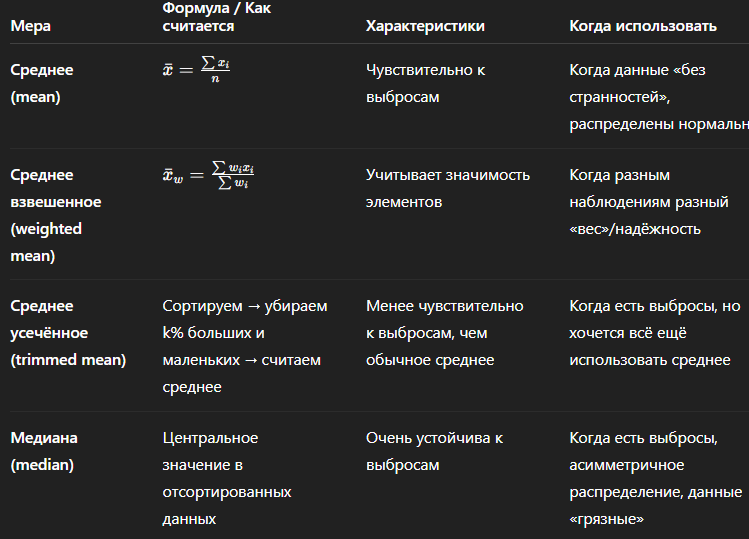

## Оценки вареабельности
* Отклонения (deviations)
* Дисперсия (variance)
* Стандартное отклонене (standard deviation) - l2, евклидова норма.
* Среднее абсолютное отклонение (mean absolute deviation) - l1, манхэттенская норма
* Процентиль (percentile)
* Межквартальный размах (interquartile range)

Отклонения - разница между значениями и оценкой центрального положения 

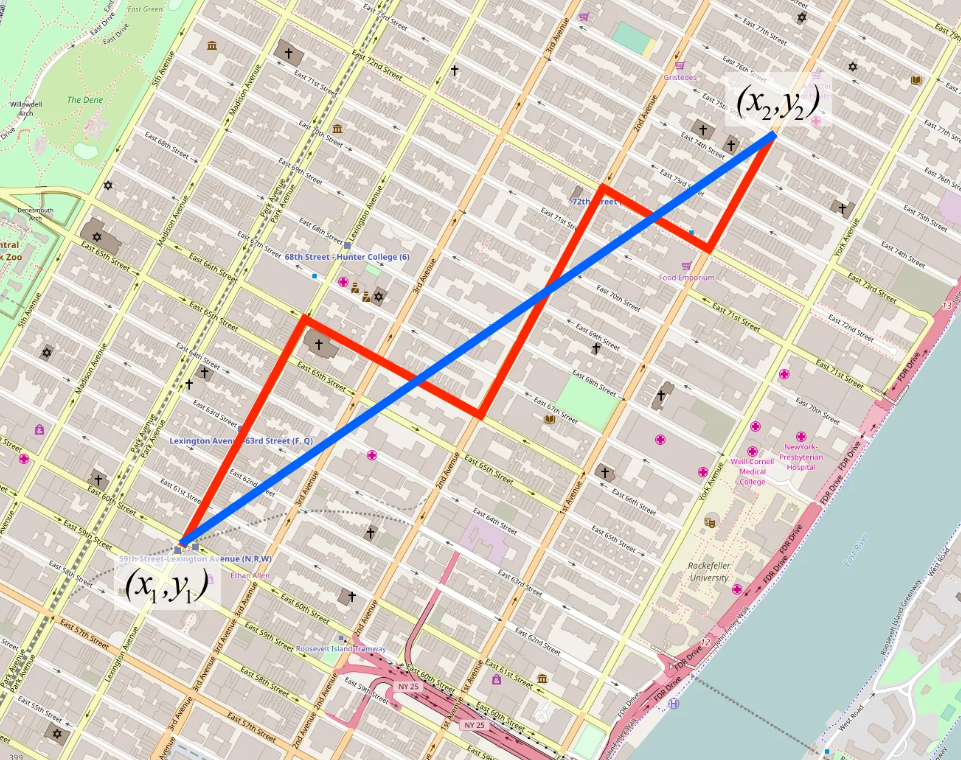

In [51]:
nums = np.array([1,4,4])
deviations = nums - nums.mean()

print(f'Deviations {deviations}')
print(f"Sum of deviations = {deviations.sum()}")

Deviations [-2.  1.  1.]
Sum of deviations = 0.0


среднение самих отклонений мало, поэтому отрицательные отклонения нейтрализуют положительные. Фактически сумма отклонений от среднего как раз равно нулю.
Вместо этого нужно взять
* абсолютноые отклонения |xi​−xˉ|
* квадрат отклонений


In [52]:
mean_abs_dev = round(abs(deviations).mean(),2)
print(f"Mean absolute deviation = {mean_abs_dev}")

Mean absolute deviation = 1.33


Самыми известными оценками вариабельности явл дисперсия и стандартное отклонение, которые основаны на квадратических отклонениях. Дисперсия это среднее квадратических отклонений, стандартное отклонение это корень из диспресии.

In [53]:
variance = (deviations * deviations / len(nums)).sum()
standard_deviation = variance ** 0.5

# numpy
# mean = np.mean(nums)
# var = np.var(nums) генеральная совакупность
# std = np.std(nums) генеральная совакупность

# var = np.var(nums, ddof=1) выборочная совакупность
# std = np.std(nums, ddof=1) выборочная совакупность


print(f'Variance = {round(variance,2)}')
print(f'Standard deviation = {round(standard_deviation,2)}')

Variance = 2.0
Standard deviation = 1.41


Ни дисперсия и стандартное отклонение, ни среднее абсолютное отклонение ну устойчивы к выбрасам !!. Дисперсия и стандартное отклонения чувствительны к выборас больше всего, покольку они основаны на квадраттческих отклонениях.

Робастной оценкой вариабельности является Медианное абсолютное отклонение от медианы (median absolute deviation, MAD) и нужно умножить на 1.4826 если данные нармально распределены, для того что бы поставить метрику в ту же шкалу, что и стандартное отклонение.

In [59]:
mad = np.median(np.abs(nums - np.median(nums)))
mad_scaled = mad * 1.4826

print(f'Median absolute deviation = {mad}')
print(f'Median absolute deviation scaled = {mad_scaled}')

Median absolute deviation = 0.0
Median absolute deviation scaled = 0.0


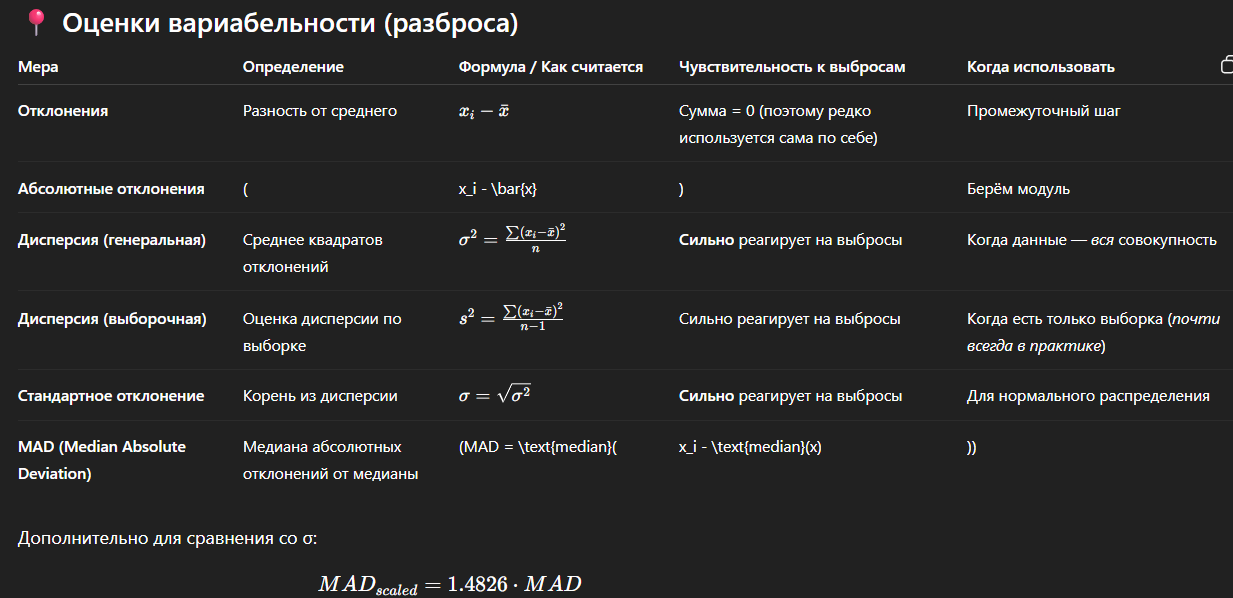
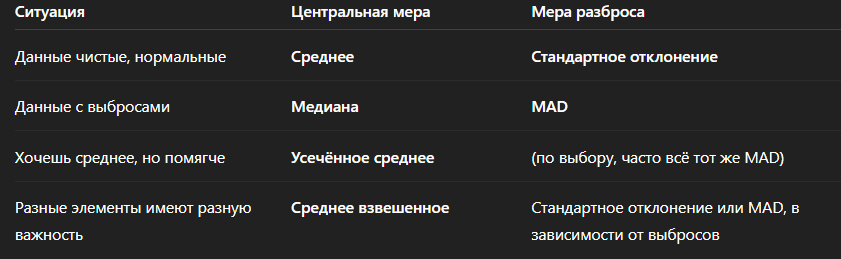

## Оценки на основе процентилей


Процентиль — это значение, которое делит данные на определённые доли по ранжированию.
Например для нахождения 80-го процентиля надо отсортировать данные, затем, начиная с самого малого значения, продолжить 80% вверх к самому крупному значению. Медиана - это тоже самое что и 50-й процентиль. Процентиль по существу аналогичен квантилю (квантиль 0.8 = 80-й процентиль)

Обще принятый мерой вареабельности явл разница между 25-м и 75-м процентилями, которая назыв межквартальным размахом (IQR) 

In [69]:
import statsmodels

data = np.array([1,4,4,10,20])

q1 = np.percentile(data,25)
q2 = np.percentile(data,50)
q3 = np.percentile(data, 75)
iqr = q3 - q1
mad = np.median(np.abs(data - np.median(data)))
print('MAD=', mad)
print("Q1 =", q1)
print("Q2 =", q2)
print("Q3 =", q3)
print("IQR =", iqr)


MAD= 3.0
Q1 = 4.0
Q2 = 4.0
Q3 = 10.0
IQR = 6.0


## Разведывание двоичных и категориальных данных

* Мода (mode) - наиболее часто встречающаяся категория или значение в наборе данных
* Ожидаемое значение или матем ожидание (expected value) - когда категории могут быть ассоциированы с числовыми значениям, этот показатель дает среднее значение, основываясь на вероятности появления категории

Матем ожидание - это среднее значение случайной велечины в долгосрочной перспективе 

Если есть вероятности то мат ожид = взвешенное среднее
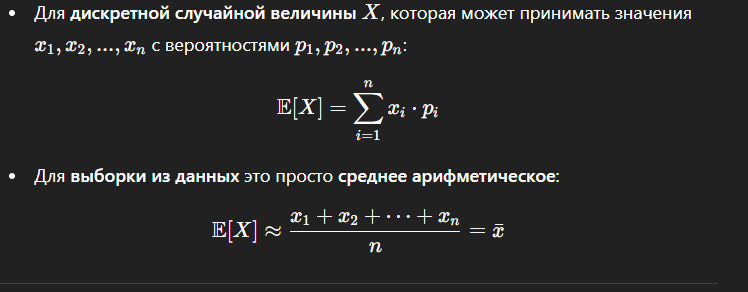

In [72]:
x = [1,0,1,1,0] # 1 = успех, 0 = неуспех
exp_val = np.mean(x)
exp_val
# 60% cлучаев будут еденицами в долгой перспективе

np.float64(0.6)

## Корреляция и Ковариация
- Ковариация - это мера совместной изменчивости двух случ величин.

- Корреляция = это мера линейной связи между двумя перевенными. Показывает как изменения одной переменной связаны с изменением другой.

* Корреляция = стандартизировання ковариация чтобы диапозон был [-1,1]
Ковариация показывает направление и масштаб совместного изменения, корреляция — сила линейной связи, без зависимости от единиц измерения.
Коэффициент корреляции - метрика которая пизмеряет степень с которой числовые переменные связаны друг с другом (в диапозоне от -1 до +1)

- 1 - полная положительная - переменные растут вместе 
- 0 - нет линейной связи - изменения одной не связаны с другой
- -1 - полная отрицательная - одна переменная растет, другая убывает

In [91]:
X = np.array([1,2,3,4,5])
Y = np.array([2,4,5,4,5])

n = len(X)

# ковариация
cov = np.sum((X - np.mean(X)) * (Y - np.mean(Y))) / (len(X) - 1)
# стандартные отклонения
std_X = np.std(X, ddof=1)
std_Y = np.std(Y, ddof=1)

r = cov / (std_X * std_Y)
r

np.float64(0.7745966692414834)

In [92]:
r = np.corrcoef(X, Y)[0,1]
r

np.float64(0.7745966692414834)